In [1]:
# common imports
import numpy as np
import pandas as pd
import os, cv2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import shuffle

# global variables
ROWS = 150
COLUMNS = 150
CHANNELS = 3
CLASSES = {0: 'cat', 1: 'dog'}

# display setup
sns.set(style="whitegrid")  # for plots

# Preface
* Dogs vs. Cats is a dataset containing 25,000 samples.
* Each sample is a colored image (JPEG file) of a dog or a cat. The image sizes vary, so they need to be scaled to the same size.
* The data contains two labels (mentioned in each image file's name), making this a **binary classification** problem.
In other words, this is a **supervised learning** task.
* The model will be trained using all available data and run without learning anymore. This method is named **offline/batch learning**.
* Main objective: Find the best algorithm and model parameters that classify the unused images correctly.

# 1. Getting the Data

In [2]:
train_path = r"dogs-vs-cats\train/"

train_images = [train_path + i for i in os.listdir(train_path)]
# listdir returns a list with the file names in the given directory

> Note: In order to use the data for ML algorithms the images need to be processed into an array containing the pixel values.
> The following functions do just that:

In [3]:
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_COLOR)
    return cv2.resize(img, (ROWS, COLUMNS), interpolation=cv2.INTER_CUBIC)


def prep_data(images):
    m = len(images)
    n_x = ROWS * COLUMNS * CHANNELS
    X = np.ndarray((m, n_x), dtype=np.uint8)
    y = np.zeros((m, 1))

# i is the count of the current iteration
# image_file is the path of the image file at the current iteration
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        X[i, :] = np.squeeze(image.reshape((n_x, 1)))
        if '/dog' in image_file.lower():
            y[i, 0] = 1
        elif '/cat' in image_file.lower():
            y[i, 0] = 0
        else:
            y[i, 0] = image_file.split('/')[-1].split('.')[0]
        if i % 5000 == 0:
            print("Loading: {}/{}".format(i, m))  # print loading progress
    print("Finished Loading Data\n")
    return shuffle(X, y, random_state=42)

In [4]:
X, labels = prep_data(train_images)

Loading: 0/25000
Loading: 5000/25000
Loading: 10000/25000
Loading: 15000/25000
Loading: 20000/25000
Finished Loading Data



In [5]:
X

array([[ 21,  43,  71, ...,  43,  49,  53],
       [255, 255, 255, ..., 255, 255, 255],
       [ 82,  83,  79, ...,   2,   0,   0],
       ...,
       [ 83,  65,  54, ...,  36,  28,  35],
       [119, 134, 175, ..., 133, 157, 203],
       [110, 112, 106, ...,  15,  19,  20]], dtype=uint8)

In [6]:
labels

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [7]:
# create a DataFrame including a column for labels
df = pd.concat([pd.DataFrame(labels, columns=['label']), pd.DataFrame(X)], axis=1)
df.head()

,label,0,1,2,3,4,5,6,7,8,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.0,21,43,71,22,44,72,21,43,71,...,100,78,88,95,67,77,84,43,49,53
1,1.0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
2,0.0,82,83,79,90,91,87,97,98,94,...,1,1,0,0,2,1,0,2,0,0
3,1.0,239,236,222,241,237,227,236,231,222,...,127,64,87,119,68,91,123,65,88,120
4,1.0,152,187,183,147,182,178,151,186,182,...,198,84,153,188,66,141,180,66,146,187


In [8]:
def show_images(X, y, index):
    image = X[index]
    image = image.reshape((ROWS, COLUMNS, CHANNELS))
    plt.figure(figsize=(6, 3))
    plt.imshow(image)
    plt.title("This is a {}".format(CLASSES[y[index, 0]]))
    plt.axis('off')
    plt.show()

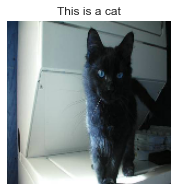

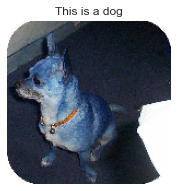

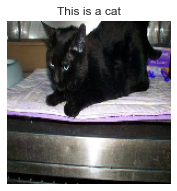

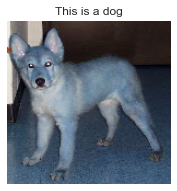

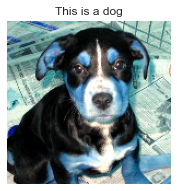

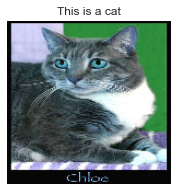

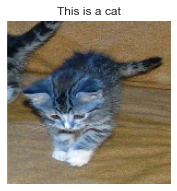

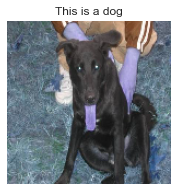

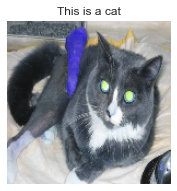

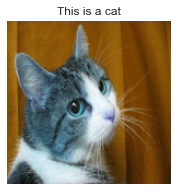

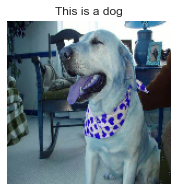

In [9]:
for i in range(11):
    show_images(X, labels, i)

In [10]:
label_groups = df.groupby('label')

# use groupby to locate instances for each label
sample0 = label_groups.get_group(0)[:3].drop('label', axis = 1)
sample1 = label_groups.get_group(1)[:3].drop('label', axis = 1)

sample_images = pd.concat([sample0, sample1], ignore_index=True)

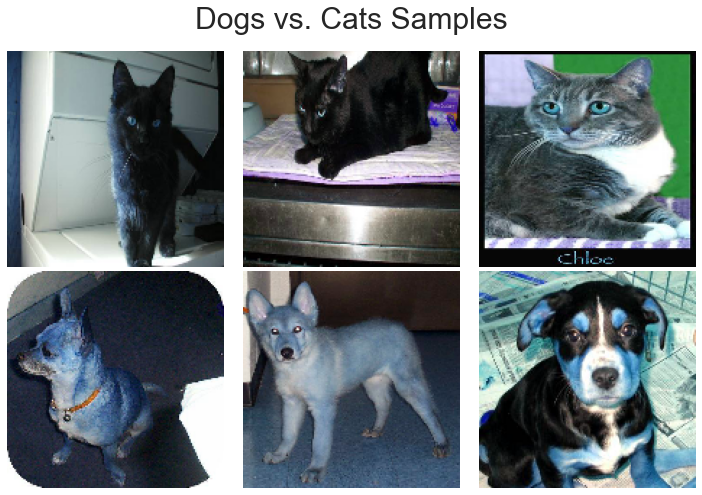

In [11]:
fig = plt.figure(figsize=(10,7))
rows = 2
columns = 3

# add sample image in each iteration
for i in range(rows*columns):
    image = sample_images[i:i+1].to_numpy().reshape((ROWS, COLUMNS, CHANNELS))
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(image)
    plt.axis('off')
fig.suptitle("Dogs vs. Cats Samples", size=30)
plt.tight_layout()
plt.show()